In [1]:
import numpy as np
import pandas as pd

# In this section, we first load the dataset into a pandas dataframe and then perform some basic exploratory data analysis (EDA).

In [2]:
df = pd.read_csv('ml_dataset.csv', delimiter=';')
df.head()
#df

,Unnamed: 0,Target,Message
0,0,internal company policy,Message-ID: <32715630.1075840547840.JavaMail.e...
1,1,alliances / partnerships,Message-ID: <8721012.1075863428380.JavaMail.ev...
2,2,internal company operations,Message-ID: <8687721.1075852656109.JavaMail.ev...
3,3,internal company operations,Message-ID: <16562450.1075846168630.JavaMail.e...
4,4,internal projects -- progress and strategy,Message-ID: <955111.1075858690252.JavaMail.eva...


In [3]:
#Labels

df['Target']

0                               internal company policy
1                              alliances / partnerships
2                           internal company operations
3                           internal company operations
4            internal projects -- progress and strategy
                             ...                       
874                         internal company operations
875                            alliances / partnerships
876                                      talking points
877          internal projects -- progress and strategy
878    regulations and regulators (includes price caps)
Name: Target, Length: 879, dtype: object

In [4]:
#Emails content
df['Message']

0      Message-ID: <32715630.1075840547840.JavaMail.e...
1      Message-ID: <8721012.1075863428380.JavaMail.ev...
2      Message-ID: <8687721.1075852656109.JavaMail.ev...
3      Message-ID: <16562450.1075846168630.JavaMail.e...
4      Message-ID: <955111.1075858690252.JavaMail.eva...
                             ...                        
874    Message-ID: <18983060.1075847582386.JavaMail.e...
875    Message-ID: <29879754.1075863427653.JavaMail.e...
876    Message-ID: <3001077.1075863428054.JavaMail.ev...
877    Message-ID: <13669071.1075863428696.JavaMail.e...
878    Message-ID: <5846581.1075852531032.JavaMail.ev...
Name: Message, Length: 879, dtype: object

In [5]:
df.drop(df.query(
    "Target == '' | Message == ''"
).index, inplace=True)

print(df.shape)

(879, 3)


# Our text features are present in the Message column and their corresponding labels are in target

In [6]:
print(f"There are {len(df)} rows in the dataset.")

There are 879 rows in the dataset.


# Features extraction

In [7]:
subject_list = []
for test_string in df['Message']:
    start_idx = test_string.find('Subject:')
    end_idx = test_string[start_idx:].find('\n')
    new_string = test_string[start_idx:start_idx+end_idx]
    subject_list.append(new_string)


df_subject_list = pd.DataFrame(subject_list, columns =['Subject'])
df_subject_list

,Subject
0,Subject: Confidential Information and Securiti...
1,Subject: FW: Venezuela FX and inflation foreca...
2,Subject: Enron Expatriates in India
3,Subject: Re: PLEASE READ & RESPOND
4,Subject: FW: ISO's Response to BPA Rebuttal of...
...,...
874,Subject: Message from Clark C. Smith
875,Subject: RE:
876,Subject: RE: Marketing Plan & Meetings
877,Subject: RE: Test Message


In [8]:
df_subject_list.drop(df_subject_list.query(
    "Subject == ''"
).index, inplace=True)

print(df_subject_list.shape)

(879, 1)


In [9]:
date_list = []
for test_string in df['Message']:
    start_idx = test_string.find('Date:')
    end_idx = test_string[start_idx:].find('\n')
    new_string = test_string[start_idx:start_idx+end_idx]
    date_list.append(new_string)


df_date_list = pd.DataFrame(date_list, columns =['Date'])
df_date_list

,Date
0,"Date: Wed, 11 Jul 2001 08:29:27 -0700 (PDT)"
1,"Date: Tue, 26 Jun 2001 09:40:17 -0700 (PDT)"
2,"Date: Wed, 13 Jun 2001 06:05:07 -0700 (PDT)"
3,"Date: Mon, 21 Aug 2000 00:30:00 -0700 (PDT)"
4,"Date: Sat, 16 Jun 2001 17:36:06 -0700 (PDT)"
...,...
874,"Date: Sun, 13 May 2001 12:37:00 -0700 (PDT)"
875,"Date: Mon, 25 Jun 2001 11:33:50 -0700 (PDT)"
876,"Date: Tue, 26 Jun 2001 08:58:12 -0700 (PDT)"
877,"Date: Wed, 27 Jun 2001 03:14:41 -0700 (PDT)"


In [10]:
df_date_list.drop(df_date_list.query(
    "Date == ''"
).index, inplace=True)

print(df_date_list.shape)

(879, 1)


In [11]:
from_list = []
for test_string in df['Message']:
    start_idx = test_string.find('From:')
    end_idx = test_string[start_idx:].find('\n')
    new_string = test_string[start_idx:start_idx+end_idx]
    from_list.append(new_string)


df_from_list = pd.DataFrame(from_list, columns =['From'])

df_from_list

,From
0,From: legalonline-compliance@enron.com
1,From: j.kaminski@enron.com
2,From: steven.kean@enron.com
3,From: steven.kean@enron.com
4,From: b..sanders@enron.com
...,...
874,From: steven.kean@enron.com
875,From: j.kaminski@enron.com
876,From: j.kaminski@enron.com
877,From: j.kaminski@enron.com


In [12]:
df_from_list.drop(df_from_list.query(
    "From == ''"
).index, inplace=True)

print(df_from_list.shape)

(879, 1)


# Analyzing features

Counter({'regulations and regulators (includes price caps)': 184, 'california energy crisis / california politics': 149, 'internal projects -- progress and strategy': 109, 'internal company operations': 78, 'political influence / contributions / contacts': 76, 'internal company policy': 67, ' company image -- current': 59, 'legal advice': 47, 'alliances / partnerships': 43, 'company image -- changing / influencing': 37, 'meeting minutes': 13, 'talking points': 13, 'trip reports': 4})


<BarContainer object of 13 artists>

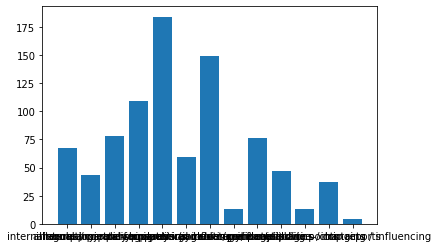

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

c = np.asarray(df['Target'])
c_count = Counter(c)
print(c_count)
plt.bar(c_count.keys(), c_count.values())

In [14]:
from collections import Counter
c = np.asarray(df_subject_list['Subject'])
c_count = Counter(c)
c_count

Counter({'Subject: Confidential Information and Securities Trading': 16,
         'Subject: FW: Venezuela FX and inflation forecasts, June 2001': 1,
         'Subject: Enron Expatriates in India': 2,
         'Subject: Re: PLEASE READ & RESPOND': 1,
         "Subject: FW: ISO's Response to BPA Rebuttal of Sheffrin Study--Confidential": 1,
         'Subject: New MSC Committee Report': 1,
         'Subject: EES Talking ABout Sending Back the New SDG&E Customers -- PLEASE': 1,
         'Subject: Security': 1,
         'Subject: Energy Issues': 45,
         'Subject: Ackerman to talk to Wolak': 1,
         'Subject: ': 28,
         'Subject: Shift May Empower California.htm': 2,
         'Subject: NYTimes.com Article: The Real Wolf': 2,
         'Subject: Follow Up On California Information': 1,
         'Subject: Talking Points For Rep. Barton On Tauzin RTO Letter': 2,
         'Subject: Form 4 Reminder for April': 1,
         'Subject: CFTC Reauthorization': 2,
         'Subject: Enron E

In [15]:
from collections import Counter
c = np.asarray(df_date_list['Date'])
c_count = Counter(c)
c_count

Counter({'Date: Wed, 11 Jul 2001 08:29:27 -0700 (PDT)': 1,
         'Date: Tue, 26 Jun 2001 09:40:17 -0700 (PDT)': 1,
         'Date: Wed, 13 Jun 2001 06:05:07 -0700 (PDT)': 1,
         'Date: Mon, 21 Aug 2000 00:30:00 -0700 (PDT)': 1,
         'Date: Sat, 16 Jun 2001 17:36:06 -0700 (PDT)': 1,
         'Date: Mon, 4 Dec 2000 02:36:00 -0800 (PST)': 1,
         'Date: Tue, 3 Apr 2001 10:23:00 -0700 (PDT)': 1,
         'Date: Fri, 4 May 2001 08:35:00 -0700 (PDT)': 1,
         'Date: Fri, 2 Mar 2001 02:32:00 -0800 (PST)': 5,
         'Date: Thu, 31 May 2001 04:19:00 -0700 (PDT)': 1,
         'Date: Fri, 11 May 2001 01:35:00 -0700 (PDT)': 1,
         'Date: Thu, 24 May 2001 11:47:43 -0700 (PDT)': 2,
         'Date: Mon, 30 Apr 2001 01:32:00 -0700 (PDT)': 1,
         'Date: Tue, 26 Jun 2001 02:14:00 -0700 (PDT)': 1,
         'Date: Wed, 14 Nov 2001 12:44:57 -0800 (PST)': 2,
         'Date: Thu, 20 Apr 2000 04:52:00 -0700 (PDT)': 1,
         'Date: Mon, 14 Aug 2000 01:54:00 -0700 (PDT)': 1,
 

In [16]:
from collections import Counter
c = np.asarray(df_from_list['From'])
c_count = Counter(c)
c_count

Counter({'From: legalonline-compliance@enron.com': 14,
         'From: j.kaminski@enron.com': 45,
         'From: steven.kean@enron.com': 436,
         'From: b..sanders@enron.com': 2,
         'From: alan.comnes@enron.com': 16,
         'From: susan.mara@enron.com': 10,
         'From: kevinscott@onlinemailbox.net': 13,
         'From: vkaminski@aol.com': 2,
         'From: john.shelk@enron.com': 83,
         'From: michelle.cash@enron.com': 14,
         'From: steven@iepa.com': 1,
         'From: lynn.blair@enron.com': 1,
         'From: gfergus@brobeck.com': 2,
         'From: mark.elliott@enron.com': 1,
         'From: miyung.buster@enron.com': 31,
         'From: marcus.nettelton@enron.com': 3,
         'From: jmunoz@mcnallytemple.com': 9,
         'From: jennifer.thome@enron.com': 1,
         'From: d..steffes@enron.com': 4,
         'From: bwoertz@caiso.com': 1,
         'From: hap.boyd@enron.com': 1,
         'From: dwatkiss@bracepatt.com': 1,
         'From: angela.wilson@enro

# Testing and Training Data preparation

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# The splitting of x and y data into four parts: x_train,y_train,x_test, and y_test

In [18]:
x_data=df_subject_list['Subject']
y_data=df['Target']

split =(int)(0.3*df.shape[0])
x_train=x_data[:split]
x_test=x_data[split:]
y_train=y_data[:split]
y_test=y_data[split:]

# Convert features to numbeurs

In [19]:
count_vector = CountVectorizer()  
extracted_features = count_vector.fit_transform(x_train)
print(extracted_features)

  (0, 519)	1
  (0, 139)	1
  (0, 273)	1
  (0, 51)	1
  (0, 476)	1
  (0, 540)	1
  (1, 519)	1
  (1, 51)	1
  (1, 231)	1
  (1, 559)	1
  (1, 233)	1
  (1, 271)	1
  (1, 223)	1
  (1, 295)	1
  (1, 12)	1
  (2, 519)	1
  (2, 193)	1
  (2, 206)	1
  (2, 266)	1
  (2, 269)	1
  (3, 519)	1
  (3, 427)	1
  (3, 385)	1
  (3, 428)	1
  (3, 448)	1
  :	:
  (260, 212)	1
  (260, 534)	1
  (260, 267)	1
  (260, 513)	1
  (260, 121)	1
  (260, 357)	1
  (261, 519)	1
  (261, 105)	1
  (261, 352)	1
  (261, 183)	1
  (261, 465)	1
  (261, 294)	1
  (261, 331)	1
  (261, 365)	1
  (261, 282)	1
  (262, 519)	1
  (262, 139)	1
  (262, 427)	1
  (262, 537)	1
  (262, 363)	1
  (262, 69)	1
  (262, 114)	1
  (262, 204)	1
  (262, 187)	1
  (262, 174)	1


# Training the Model

In [20]:
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}
model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(extracted_features,y_train)

print("Model Trained Successfully!")

C:\Users\SANOU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Model Trained Successfully!


# Computing Accuracy 

In [21]:
print("Accuracy of the model is: ",model.score(count_vector.transform(x_test),y_test)*100)

Accuracy of the model is:  30.1948051948052
